<a href="https://colab.research.google.com/github/arianarosario/DFA-project/blob/main/deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data imports & data cleaning

### Importing the data

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
feature_data = cdc_diabetes_health_indicators.data.features
target_data = cdc_diabetes_health_indicators.data.targets


In [2]:
# metadata
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [3]:
# variable information
variable_info = cdc_diabetes_health_indicators.variables
variable_info

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


# 2. Summary statistics

### Exploring the data

In [4]:
# view the first few rows of the data
feature_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
feature_data.describe(include='all')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
feature_data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [7]:
sensitive_attributes = ['Sex', 'Age', 'Education', 'Income']

variable_info[variable_info['name'].isin(sensitive_attributes)]

,name,role,type,demographic,description,units,missing_values
19,Sex,Feature,Binary,Sex,0 = female 1 = male,None,no
20,Age,Feature,Integer,Age,13-level age category (_AGEG5YR see codebook) ...,None,no
21,Education,Feature,Integer,Education Level,Education level (EDUCA see codebook) scale 1-6...,None,no
22,Income,Feature,Integer,Income,Income scale (INCOME2 see codebook) scale 1-8 ...,None,no


In [8]:
# Variable Detailed Description from Codebook
# source: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Sex_desc = {
    0: 'Female',
    1: 'Male'
}

Age_desc = {
    1: 'Age 18 to 24',
    2: 'Age 25 to 29',
    3: 'Age 30 to 34',
    4: 'Age 35 to 39',
    5: 'Age 40 to 44',
    6: 'Age 45 to 49',
    7: 'Age 50 to 54',
    8: 'Age 55 to 59',
    9: 'Age 60 to 64',
    10: 'Age 65 to 69',
    11: 'Age 70 to 74',
    12: 'Age 75 to 79',
    13: 'Age 80 or older'
    }

Education_desc = {
    1: 'Never attended school or only kindergarten',
    2: 'Grades 1 through 8 (Elementary)',
    3: 'Grades 9 through 11 (Some high school)',
    4: 'Grade 12 or GED (High school graduate)',
    5: 'College 1 year to 3 years (Some college or technical school)',
    6: 'College 4 years or more (College graduate)'
}

Income_desc = {
    1: 'Less than $10,000',
    2: 'Less than $15,000 ($10,000 to less than $15,000)',
    3: 'Less than $20,000 ($15,000 to less than $20,000)',
    4: 'Less than $25,000 ($20,000 to less than $25,000)',
    5: 'Less than $35,000 ($25,000 to less than $35,000)',
    6: 'Less than $50,000 ($35,000 to less than $50,000)',
    7: 'Less than $75,000 ($50,000 to less than $75,000)',
    8: '$75,000 or more',
}

### a. How many rows & columns of data do you have, both overall, and per sensitive attribute subgroup?

In [9]:
# How many rows & columns of data do you have, both overall, and per sensitive attribute subgroup?

rows, columns = feature_data.shape
print(f'There are {rows} rows and {columns} columns in the dataset')

for att in sensitive_attributes:
    print(f'\n{att} Variable:')

    n_subgroups = feature_data[att].nunique()
    desc_dict_name = att + '_desc'
    if att=='Sex':
        first_val = 0
    else:
        first_val = 1

    for subgroup in range(first_val, n_subgroups + first_val):

        subgroup_name = eval(desc_dict_name)[subgroup]
        print(f'  {subgroup} ({subgroup_name}): {len(feature_data[feature_data[att] == subgroup])} rows')


There are 253680 rows and 21 columns in the dataset

Sex Variable:
  0 (Female): 141974 rows
  1 (Male): 111706 rows

Age Variable:
  1 (Age 18 to 24): 5700 rows
  2 (Age 25 to 29): 7598 rows
  3 (Age 30 to 34): 11123 rows
  4 (Age 35 to 39): 13823 rows
  5 (Age 40 to 44): 16157 rows
  6 (Age 45 to 49): 19819 rows
  7 (Age 50 to 54): 26314 rows
  8 (Age 55 to 59): 30832 rows
  9 (Age 60 to 64): 33244 rows
  10 (Age 65 to 69): 32194 rows
  11 (Age 70 to 74): 23533 rows
  12 (Age 75 to 79): 15980 rows
  13 (Age 80 or older): 17363 rows

Education Variable:
  1 (Never attended school or only kindergarten): 174 rows
  2 (Grades 1 through 8 (Elementary)): 4043 rows
  3 (Grades 9 through 11 (Some high school)): 9478 rows
  4 (Grade 12 or GED (High school graduate)): 62750 rows
  5 (College 1 year to 3 years (Some college or technical school)): 69910 rows
  6 (College 4 years or more (College graduate)): 107325 rows

Income Variable:
  1 (Less than $10,000): 9811 rows
  2 (Less than $15,000 (

### b. What are your outcome variables of interest?
> Our outcome variable is called *"Diabetes_binary"* and is stored in target_data


In [10]:
# What mean / median / standard deviation values do the outcome variables have overall?

target_data.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
# What about these statistics within each relevant sensitive attribute subgroup?

# merging target and feature data
merged_data = feature_data.copy()
merged_data['Diabetes_binary'] = target_data

for att in sensitive_attributes:
    print(f'\n{att} Variable:')

    n_subgroups = merged_data[att].nunique()
    desc_dict_name = att + '_desc'
    if att=='Sex':
        first_val = 0
    else:
        first_val = 1

    for subgroup in range(first_val, n_subgroups + first_val):

        subgroup_name = eval(desc_dict_name)[subgroup]
        subgroup_diabetes_percent = merged_data[merged_data[att] == subgroup]['Diabetes_binary'].mean()
        print(f'\t{subgroup} ({subgroup_name}): \t{subgroup_diabetes_percent:.2%} have diabetes')



Sex Variable:
	0 (Female): 	12.97% have diabetes
	1 (Male): 	15.16% have diabetes

Age Variable:
	1 (Age 18 to 24): 	1.37% have diabetes
	2 (Age 25 to 29): 	1.84% have diabetes
	3 (Age 30 to 34): 	2.82% have diabetes
	4 (Age 35 to 39): 	4.53% have diabetes
	5 (Age 40 to 44): 	6.50% have diabetes
	6 (Age 45 to 49): 	8.79% have diabetes
	7 (Age 50 to 54): 	11.74% have diabetes
	8 (Age 55 to 59): 	13.83% have diabetes
	9 (Age 60 to 64): 	17.25% have diabetes
	10 (Age 65 to 69): 	20.37% have diabetes
	11 (Age 70 to 74): 	21.85% have diabetes
	12 (Age 75 to 79): 	21.30% have diabetes
	13 (Age 80 or older): 	18.48% have diabetes

Education Variable:
	1 (Never attended school or only kindergarten): 	27.01% have diabetes
	2 (Grades 1 through 8 (Elementary)): 	29.26% have diabetes
	3 (Grades 9 through 11 (Some high school)): 	24.22% have diabetes
	4 (Grade 12 or GED (High school graduate)): 	17.64% have diabetes
	5 (College 1 year to 3 years (Some college or technical school)): 	14.81% have di

### c. Plot at least as many figures as your # group members, and explain concisely but meaningfully what the plot shows in markdown text

In [12]:
# helper function to plot a varible distribution

import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(data, col, labels):
    sns.countplot(x=col, data=data,
                  stat="percent", palette=['lightcoral','skyblue'])
    if labels:
        plt.xticks(ticks=[0,1], labels=labels.values())
        plt.xlabel('')


#### Relative Distribution of Binary Variables

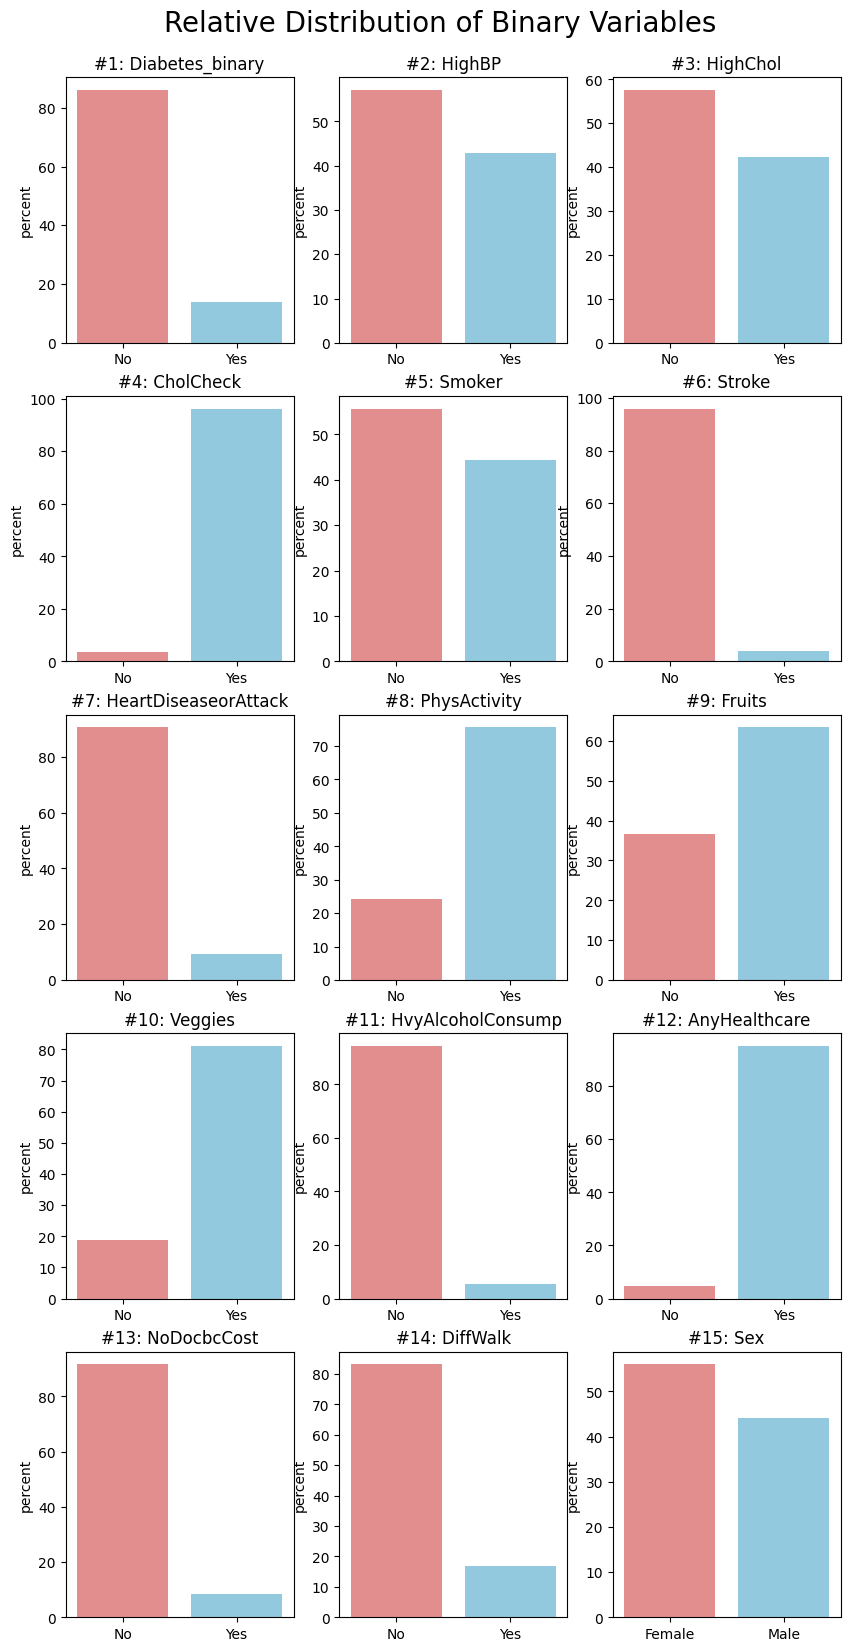

In [13]:
# hiding warnings
import warnings
warnings.filterwarnings('ignore')

# setting up multi plot
fig = plt.figure(figsize=(10,20))
plt.suptitle('Relative Distribution of Binary Variables',
             va='bottom', y=0.9, fontsize=20)
fig_count = 1

# plotting target variable
col = 'Diabetes_binary'
x_labels = {0:'No',1:'Yes'}

plt.subplot(5, 3, fig_count)
plt.title("#"+str(fig_count)+": "+col)
plot_dist(target_data, col, x_labels)

# plotting binary features (14 out of 21)
binary_features = feature_data.columns[feature_data.nunique() == 2]

for col in binary_features:
    fig_count += 1

    if col == 'Sex':
        x_labels = {0:'Female',1:'Male'}

    plt.subplot(5, 3, fig_count)
    plt.title("#"+str(fig_count)+": "+col)
    plot_dist(feature_data, col, x_labels)

plt.show()


#### Relative Distribution of Other Variables

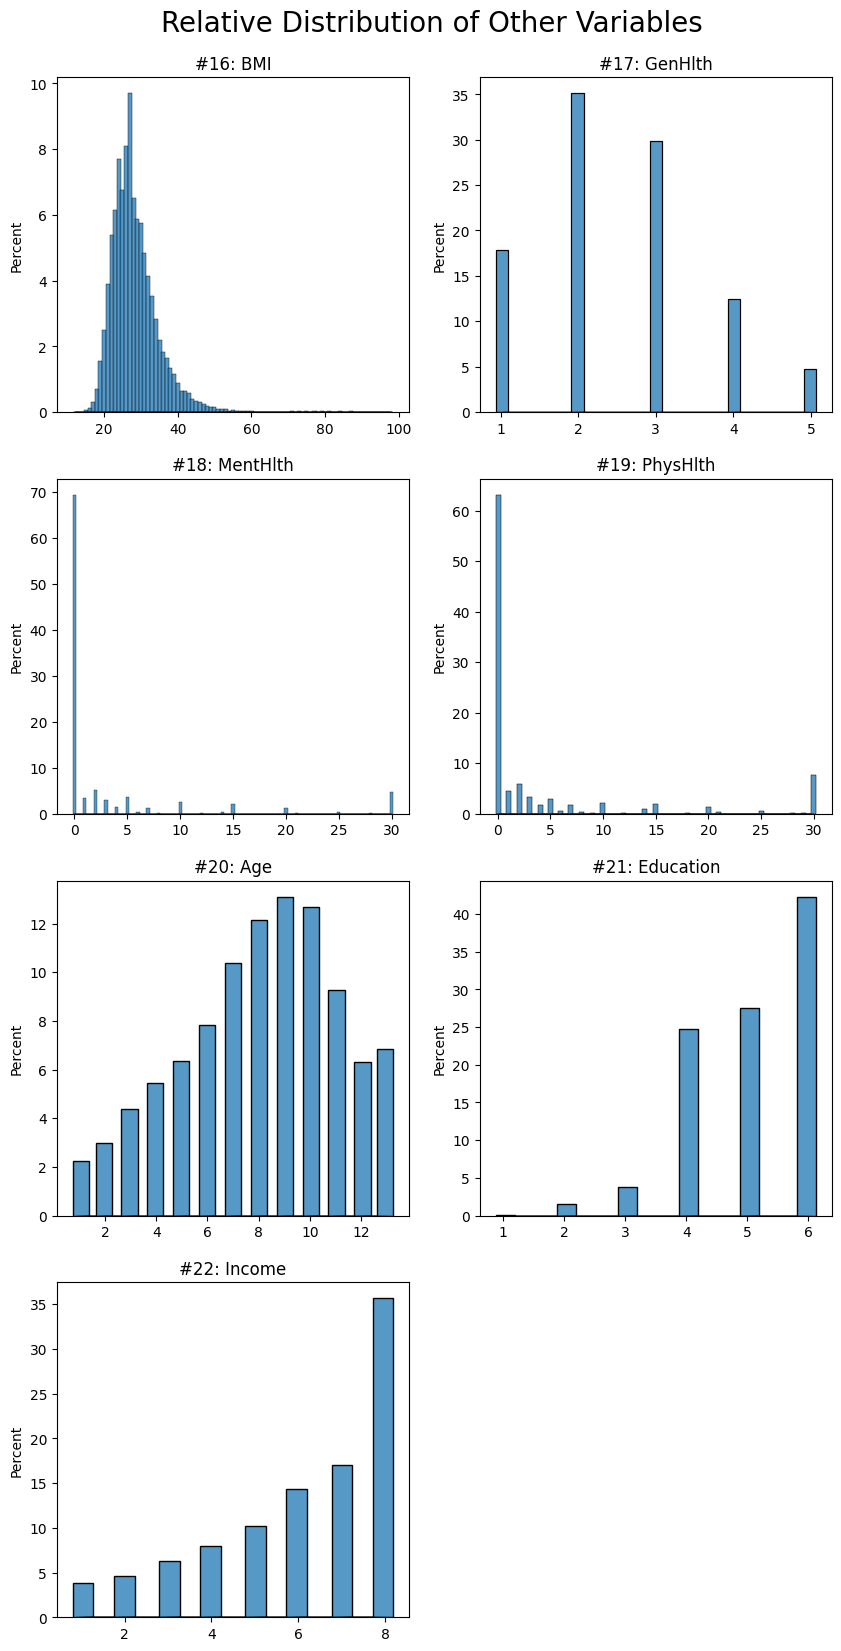

In [14]:
other_features = [feat for feat in feature_data.columns if feat not in binary_features]

# setting up multi plot
fig = plt.figure(figsize=(10,20))
plt.suptitle('Relative Distribution of Other Variables',
             va='bottom', y=0.9, fontsize=20)
fig_count = 1

for att in other_features:
    plt.subplot(4, 2, fig_count)
    sns.histplot(x=att , data=merged_data, stat="percent", shrink=5)
    plt.xlabel('')

    plt.title("#"+str(fig_count+15)+": "+att)

    fig_count += 1
plt.show()

#### Correlation Heatmap

<Axes: >

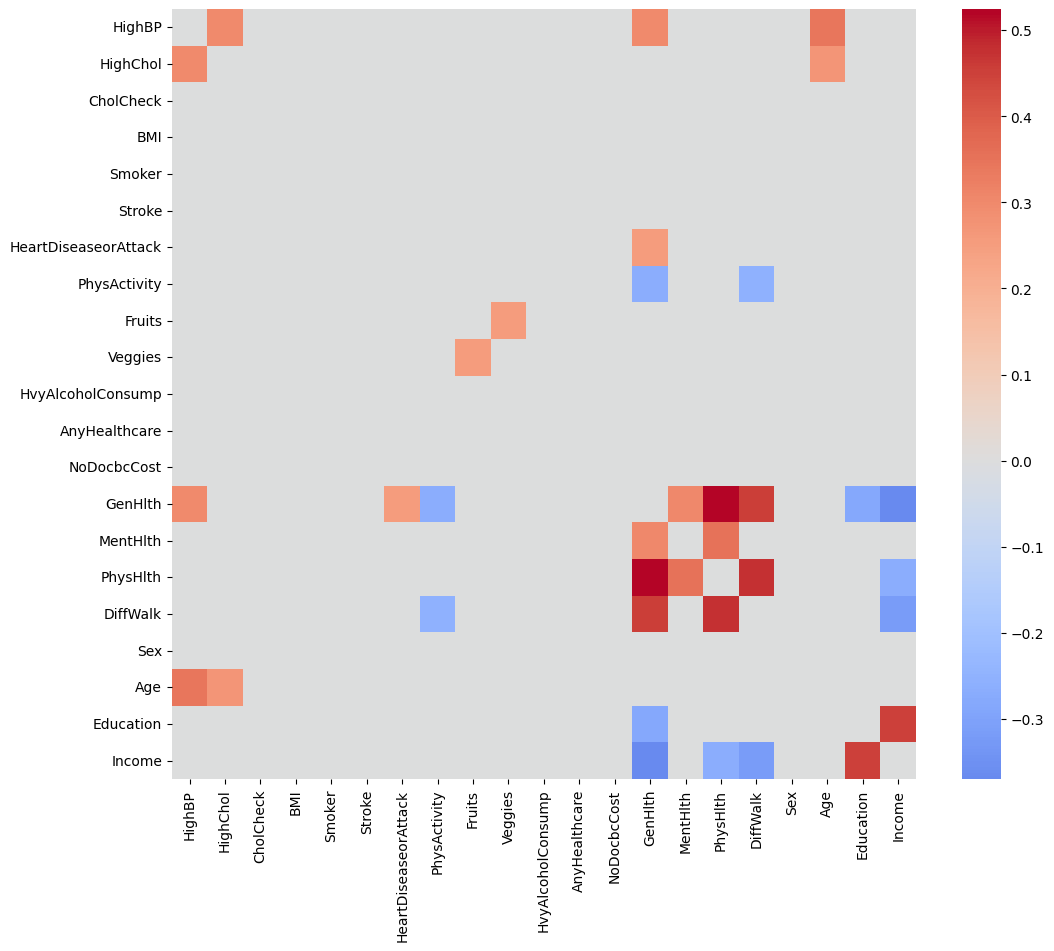

In [15]:
# creating a heatmap to show correlation between the features
plt.figure(figsize=(12,10))
correlation = feature_data.corr()

# selecting the highly correlated features (abs corr > 0.25)
hi_corr = correlation.copy()
threshold = 0.25
hi_corr[(abs(hi_corr) < threshold) | (abs(hi_corr) > 0.99)] = 0
sns.heatmap(hi_corr, annot=False, cmap='coolwarm', center=0)


# 3. Research Question, Hypotheses, and Analysis Plan

### a. Concretely, what is (are) your research question(s)? Be specific: what are the inputs, outputs, and evaluation metrics you are interested in, and why?

> * Does diabetes prediction accuracy change across income groups?
> * Does diabetes prediction accuracy change across sex groups?
> * If there do exist differences, what are the driving factors?

#### Inputs
> * Our inputs include: HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, and DiffWalk.
> * The demographic input data are Sex, Age, Education, and Income.

#### Outputs
> Our output is the binary prediction such that 1 is the patient is diagnosed with diabetes or prediabetes and 0 represents that the patient is not diabetic.

#### Evaluation metrics
> The evaluation metrics we want to use for our algorithm include assessing if the accuracy, precision, recall, and FNR is different for various income and sex groups.

### b. What are your hypotheses? e.g., do you notice any potential biases from your summary statistics? What are they, and why might these exist?

> * From the summary statistics, we observe that there are about **27% more females** than males identified in the data.
> * Additionally, almost all participants had indicated that they had their cholesterol check in the past 5 years. There could be a bias in the dataset towards individuals that are more health conscious, have had family history of high cholesterol, and previous concerns regarding their cholesterol levels and are predisposed to a diagnosis related to their cholesterol levels. Additionally, this indicator could be associated with most of the participants having an income level of around $75,000 or more. Many of the participants in this dataset could have the financial ability to upkeep with annual check ups and take preventative cautions in regards to cholesterol levels and a potential diabetes diagnosis.

### c. What analyses are you going to run (in section 4) to test your hypotheses presented above?
> * We will be testing our hypotheses with the following models: Linear Regression, SVM, LightGBM, Naive Bayes, and Random Forest.
> * To observe potential biases in prediction, we will utilize upsampling methods for minority groups and compare with its reciprocal model without upsampling methods employed.





# 4. Modeling

## Model 1: Naive Bayes
### a. Model

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

In [17]:
X = feature_data
y = target_data.Diabetes_binary

In [18]:
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25)

In [19]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### b. Evaluation Metrics

In [20]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

In [21]:
# Evaluate the model
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1-Score on Validation Set: {f1}")

F1-Score on Validation Set: 0.7947221369461296


In [22]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1-Score on Test Set: {f1}")

F1-Score on Test Set: 0.7996658952552012


Since the f1-score for the validation set and test set are comparable, we can state that there are no signs of overfitting.

In [23]:
print(metrics.classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     43652
           1       0.33      0.58      0.42      7084

    accuracy                           0.78     50736
   macro avg       0.63      0.69      0.64     50736
weighted avg       0.84      0.78      0.80     50736

Confusion Matrix:
 [[35269  8383]
 [ 2975  4109]]


3087 participants were identified as non-diabetic when they were diabetic or prediabetic in actuality. The FNR from utilizing Naive Bayes is 0.432.

In [24]:
female_idx = X_test['Sex']==0
male_idx = X_test['Sex']==1

female_test = y_test.loc[female_idx]
male_test = y_test.loc[male_idx]

female_pred  = y_test_pred[female_idx]
male_pred = y_test_pred[male_idx]

y_pred_prob = model.predict_proba(X_test)[:, 1]
female_score = y_pred_prob[female_idx]
male_score = y_pred_prob[male_idx]

true_y = {'all': y_test, 'female':female_test, 'male':male_test}
pred_y = {'female':female_pred, 'male':male_pred}
prob_y = {'all':y_pred_prob, 'female':female_score, 'male':male_score}

for group in ['all', 'female', 'male']:
    AUC = metrics.roc_auc_score(true_y[group], prob_y[group])
    print(f'AUC ({group} participants): {AUC:.4f}')


tn, fp, fn, tp = {}, {}, {}, {}
for group in ['female', 'male']:
    tn[group], fp[group], fn[group], tp[group] = metrics.confusion_matrix(true_y[group], pred_y[group]).ravel()

AUC (all participants): 0.7877
AUC (female participants): 0.8016
AUC (male participants): 0.7730


In [25]:
for group in ['female', 'male']:
    FNR = fn[group]/(tp[group]+fn[group])
    print(f'FNR ({group} participants): {FNR:.4f}')

FNR (female participants): 0.3964
FNR (male participants): 0.4450


In [26]:
for group in ['female', 'male']:
    FPR = fp[group]/(tn[group]+fp[group])
    print(f'FPR ({group} participants): {FPR:.4f}')

FPR (female participants): 0.1952
FPR (male participants): 0.1879


In [27]:
for group in ['female', 'male']:
    PR = pred_y[group].mean()
    print(f'Fraction positive ({group} participants): {PR:.4f}')

Fraction positive (female participants): 0.2480
Fraction positive (male participants): 0.2440


In [28]:
X_test.Income.unique()

array([6, 4, 7, 3, 5, 2, 8, 1])

In [29]:
one_idx = X_test['Income']==1
two_idx = X_test['Income']==2
three_idx = X_test['Income']==3
four_idx = X_test['Income']==4
five_idx = X_test['Income']==5
six_idx = X_test['Income']==6
seven_idx = X_test['Income']==7
eight_idx = X_test['Income']==8

one_test = y_test.loc[one_idx]
two_test = y_test.loc[two_idx]
three_test = y_test.loc[three_idx]
four_test = y_test.loc[four_idx]
five_test = y_test.loc[five_idx]
six_test = y_test.loc[six_idx]
seven_test = y_test.loc[seven_idx]
eight_test = y_test.loc[eight_idx]

one_pred  = y_test_pred[one_idx]
two_pred = y_test_pred[two_idx]
three_pred = y_test_pred[three_idx]
four_pred = y_test_pred[four_idx]
five_pred = y_test_pred[five_idx]
six_pred = y_test_pred[six_idx]
seven_pred = y_test_pred[seven_idx]
eight_pred = y_test_pred[eight_idx]

y_pred_prob = model.predict_proba(X_test)[:, 1]
one_score = y_pred_prob[one_idx]
two_score = y_pred_prob[two_idx]
three_score = y_pred_prob[three_idx]
four_score = y_pred_prob[four_idx]
five_score = y_pred_prob[five_idx]
six_score = y_pred_prob[six_idx]
seven_score = y_pred_prob[seven_idx]
eight_score = y_pred_prob[eight_idx]


true_y = {'all': y_test, 'Income 1':one_test, 'Income 2':two_test, 'Income 3':three_test,
          'Income 4':four_test,'Income 5':five_test,'Income 6':six_test,'Income 7':seven_test,'Income 8':eight_test}
pred_y = {'Income 1':one_pred, 'Income 2':two_pred, 'Income 3':three_pred,
          'Income 4':four_pred,'Income 5':five_pred,'Income 6':six_pred,'Income 7':seven_pred,'Income 8':eight_pred}
prob_y = {'all': y_pred_prob, 'Income 1':one_score, 'Income 2':two_score, 'Income 3':three_score,
          'Income 4':four_score,'Income 5':five_score,'Income 6':six_score,'Income 7':seven_score,'Income 8':eight_score}


for group in ['all', 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    AUC = metrics.roc_auc_score(true_y[group], prob_y[group])
    print(f'AUC ({group} participants): {AUC:.4f}')


tn, fp, fn, tp = {}, {}, {}, {}
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    tn[group], fp[group], fn[group], tp[group] = metrics.confusion_matrix(true_y[group], pred_y[group]).ravel()

AUC (all participants): 0.7877
AUC (Income 1 participants): 0.7304
AUC (Income 2 participants): 0.7126
AUC (Income 3 participants): 0.7356
AUC (Income 4 participants): 0.7504
AUC (Income 5 participants): 0.7566
AUC (Income 6 participants): 0.7649
AUC (Income 7 participants): 0.7802
AUC (Income 8 participants): 0.7990


In [30]:
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    FNR = fn[group]/(tp[group]+fn[group])
    print(f'FNR ({group} participants): {FNR:.4f}')

FNR (Income 1 participants): 0.1401
FNR (Income 2 participants): 0.1534
FNR (Income 3 participants): 0.2322
FNR (Income 4 participants): 0.2989
FNR (Income 5 participants): 0.3701
FNR (Income 6 participants): 0.4556
FNR (Income 7 participants): 0.5631
FNR (Income 8 participants): 0.6782


In [31]:
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    FPR = fp[group]/(tn[group]+fp[group])
    print(f'FPR ({group} participants): {FPR:.4f}')

FPR (Income 1 participants): 0.5493
FPR (Income 2 participants): 0.5314
FPR (Income 3 participants): 0.4123
FPR (Income 4 participants): 0.3360
FPR (Income 5 participants): 0.2607
FPR (Income 6 participants): 0.1900
FPR (Income 7 participants): 0.1335
FPR (Income 8 participants): 0.0742


In [32]:
for group in 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8':
    PR = pred_y[group].mean()
    print(f'Fraction positive ({group} participants): {PR:.4f}')

Fraction positive (Income 1 participants): 0.6234
Fraction positive (Income 2 participants): 0.6071
Fraction positive (Income 3 participants): 0.4949
Fraction positive (Income 4 participants): 0.4106
Fraction positive (Income 5 participants): 0.3274
Fraction positive (Income 6 participants): 0.2411
Fraction positive (Income 7 participants): 0.1705
Fraction positive (Income 8 participants): 0.0941


### c. Informative Plots

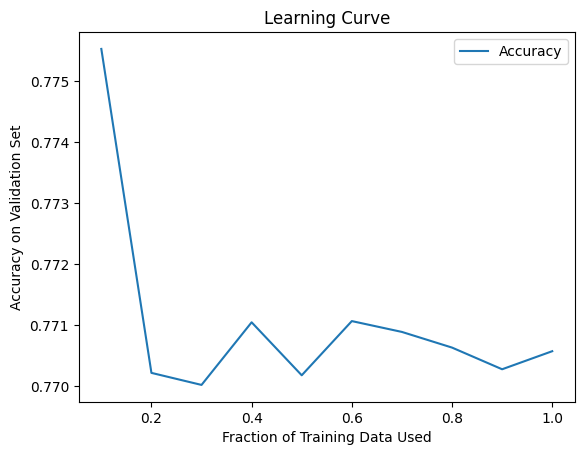

In [33]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []

for size in train_sizes:
    subset_size = int(size * X_train.shape[0])
    X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]
    model.fit(X_subset, y_subset)
    train_scores.append(model.score(X_val, y_val))

# Plotting the learning curve over accuracy in validation set
plt.plot(train_sizes, train_scores, label='Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('Accuracy on Validation Set')
plt.legend()
plt.show()

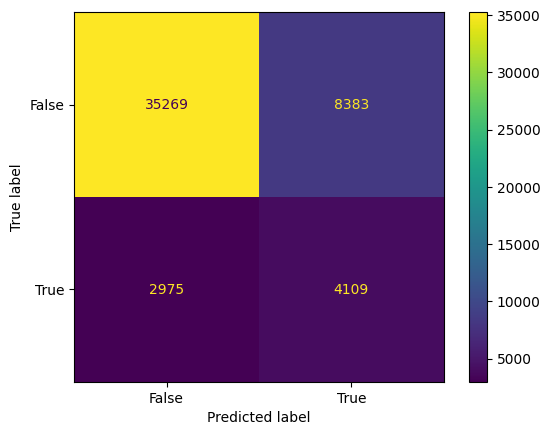

In [34]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred), display_labels = [False, True])

cm_display.plot()
plt.show()

## Model 2: Logistic Regression
### a. Model

In [35]:
from sklearn.linear_model import LogisticRegression
X = feature_data
y = target_data.Diabetes_binary

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# predicting on the test set
y_pred_logreg = logistic_model.predict(X_test)
y_pred_proba_logreg = logistic_model.predict_proba(X_test)[:, 1]


### b. Evaluation Metrics

In [36]:
from sklearn.metrics import roc_auc_score
# calculating the AUC and F1 score
AUC_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f'AUC: {AUC_logreg:.4f}')
print(f'F1 Score: {f1_logreg:.4f}')

AUC: 0.8113
F1 Score: 0.2187


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43737
           1       0.52      0.14      0.22      6999

    accuracy                           0.86     50736
   macro avg       0.70      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736



In [38]:
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_logreg))

Confusion Matrix:
 [[42828   909]
 [ 6028   971]]


In [39]:
# calculating AUC and FNR for each sensitive attribute subgroup

AUC_subgroups = {}
FNR_subgroups = {}
FPR_subgroups = {}

for att in sensitive_attributes:
    AUC_subgroups[att] = {}
    FNR_subgroups[att] = {}
    FPR_subgroups[att] = {}

    subgroups = feature_data[att].unique()
    for subgroup in subgroups:
        curr_subgroup_index = X_test[att] == subgroup
        curr_X_test = X_test[curr_subgroup_index]
        curr_y_test = y_test[curr_subgroup_index]
        curr_y_pred = logistic_model.predict(curr_X_test)
        curr_y_pred_proba = logistic_model.predict_proba(curr_X_test)[:, 1]
        curr_AUC = roc_auc_score(curr_y_test, curr_y_pred_proba)
        tn, fp, fn, tp = confusion_matrix(curr_y_test, curr_y_pred).ravel()
        curr_FNR = fn/(tp+fn)
        curr_FPR = fp/(tn+fp)

        AUC_subgroups[att][subgroup] = curr_AUC
        FNR_subgroups[att][subgroup] = curr_FNR
        FPR_subgroups[att][subgroup] = curr_FPR

In [40]:
# formatting the results into a df

data = [(att, subgroup) for att, subgroups in AUC_subgroups.items() for subgroup in subgroups]
results_df = pd.DataFrame(data, columns=['Attribute', 'Subgroup'])

results_df['AUC'] = [AUC_subgroups[att][subgroup] for att, subgroups in AUC_subgroups.items() for subgroup in subgroups]
results_df['FNR'] = [FNR_subgroups[att][subgroup] for att, subgroups in FNR_subgroups.items() for subgroup in subgroups]
results_df['FPR'] = [FPR_subgroups[att][subgroup] for att, subgroups in FPR_subgroups.items() for subgroup in subgroups]

results_df

,Attribute,Subgroup,AUC,FNR,FPR
0,Sex,0,0.824063,0.849252,0.019583
1,Sex,1,0.794377,0.874549,0.022366
2,Age,9,0.799114,0.852915,0.023587
3,Age,7,0.818982,0.887299,0.014465
4,Age,11,0.735028,0.855100,0.038294
5,Age,10,0.774910,0.851195,0.028723
6,Age,8,0.813937,0.844394,0.016756
7,Age,13,0.688361,0.835218,0.050584
8,Age,4,0.827404,0.975000,0.002254
9,Age,6,0.831590,0.891667,0.007440


### c. Informative Plots

## Model 3: SVC

### a. Model


In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
X = feature_data
y = target_data['Diabetes_binary']

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
from sklearn.utils import resample
from sklearn.svm import LinearSVC

# Selecting a random subset of the data
X_train_subset, y_train_subset = resample(X_train_smote, y_train_smote, n_samples=int(len(X_train) * 0.1), random_state=42, replace=False)

# Training the LinearSVC model on the subset
linear_svc_subset_model = LinearSVC(random_state=42, max_iter=1000, C=0.1)
linear_svc_subset_model.fit(X_train_subset, y_train_subset)

# Predicting on the test set
y_pred_subset = linear_svc_subset_model.predict(X_test)

In [54]:
y_pred_subset

array([0, 1, 0, ..., 0, 1, 0])

### b. Evaluation Metrics

In [42]:
from sklearn.metrics import roc_auc_score

# Calculating AUC
auc_score = roc_auc_score(y_test, y_pred_subset)
auc_score


0.7501239005655642

In [43]:
# Calculating accuracy for the LinearSVC model trained on the subset
accuracy_subset = accuracy_score(y_test, y_pred_subset)
accuracy_subset

0.7244165878271839

In [44]:
from sklearn.metrics import confusion_matrix

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_subset)

# Extracting false negatives (FN) and true positives (TP)
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

# Calculating the False Negative Rate (FNR)
FNR = FN / (FN + TP)
FNR

0.21437759039588394

In [45]:
from sklearn.metrics import classification_report

# Generating a classification report
class_report = classification_report(y_test, y_pred_subset)
print(class_report)


              precision    recall  f1-score   support

           0       0.95      0.71      0.82     43739
           1       0.31      0.79      0.44      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.72      0.77     50736



In [58]:
y_pred_subset_df = pd.DataFrame(y_pred_subset, columns=['Predicted_Diabetes_binary'])

# Ensure the lengths match before merging
if len(y_pred_subset_df) == len(X_test):
    # Add the predictions to the test dataset (need to convert X_test back to DataFrame first)
    X_test_df = pd.DataFrame(X_test, columns=feature_data.columns)
    test_with_pred_df = X_test_df.reset_index(drop=True)
    test_with_pred_df['Predicted_Diabetes_binary'] = y_pred_subset_df.reset_index(drop=True)
    test_with_pred_df['True_Diabetes_binary'] = y_test.reset_index(drop=True)
else:
    result = "The length of the prediction set does not match the test set, can't proceed with merging."

# Checking the first few rows to confirm merge was successful
test_with_pred_df


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Predicted_Diabetes_binary,True_Diabetes_binary
0,0,0,1,34,1,0,0,1,0,1,...,3,0,3,0,0,11,6,8,0,0
1,0,0,1,30,1,0,0,0,0,1,...,2,5,0,0,0,5,6,8,1,0
2,1,1,1,37,0,0,0,1,1,1,...,2,0,0,0,0,11,6,8,0,0
3,0,1,1,25,0,0,0,1,1,1,...,1,0,0,0,0,10,6,8,0,0
4,1,1,1,29,0,0,0,1,0,1,...,1,0,0,0,0,9,6,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,0,1,1,27,1,0,1,1,0,1,...,2,0,0,0,1,11,3,6,0,1
50732,1,0,1,31,1,0,0,0,0,0,...,3,30,8,1,0,10,6,6,0,0
50733,1,1,1,27,0,0,1,0,1,1,...,2,1,0,0,0,9,5,8,0,0
50734,1,0,1,27,1,0,0,1,0,1,...,3,30,7,1,1,10,5,8,1,0


In [74]:
from sklearn.metrics import roc_auc_score, confusion_matrix
import numpy as np

def calculate_fnr_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp) if (fn + tp) > 0 else np.nan
    fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan
    return fnr, fpr

# Function to calculate AUC
def calculate_auc(y_true, y_pred_proba):
    # Check if both classes are present
    if len(np.unique(y_true)) == 1:
        return np.nan
    return roc_auc_score(y_true, y_pred_proba)

# Placeholder for results
results = {}

# Demographic categories
categories = ['Sex', 'Income', 'Education', 'Age']

# Loop through each category and calculate metrics
for cat in categories:
    results[cat] = {}
    for subgroup in test_with_pred_df[cat].unique():
        subgroup_mask = test_with_pred_df[cat] == subgroup
        y_true_subgroup = test_with_pred_df[subgroup_mask]['True_Diabetes_binary']
        y_pred_subgroup = test_with_pred_df[subgroup_mask]['Predicted_Diabetes_binary']

        # Calculate FNR
        results[cat][subgroup] = {
            'FNR': calculate_fnr_fpr(y_true_subgroup, y_pred_subgroup)
        }

        # Attempt to calculate AUC if predicted probabilities were available
        # For demonstration, using predicted labels as a placeholder
        # Replace `y_pred_subgroup` with the probability predictions if available
        results[cat][subgroup]['AUC'] = calculate_auc(y_true_subgroup, y_pred_subgroup)

In [75]:
results_df = pd.DataFrame(columns=['Demographic', 'Subgroup', 'FNR', 'FPR', 'AUC'])

for cat in results:
    for subgroup in results[cat]:
        fnr, fpr = calculate_fnr_fpr(test_with_pred_df[test_with_pred_df[cat] == subgroup]['True_Diabetes_binary'],
                                     test_with_pred_df[test_with_pred_df[cat] == subgroup]['Predicted_Diabetes_binary'])
        auc = results[cat][subgroup]['AUC']

        results_df = results_df.append({
            'Demographic': cat,
            'Subgroup': subgroup,
            'FNR': fnr,
            'FPR': fpr,
            'AUC': auc
        }, ignore_index=True)

# Adjusting data types for better formatting
results_df['Subgroup'] = results_df['Subgroup'].astype(int)
results_df['FNR'] = results_df['FNR'].astype(float)
results_df['FPR'] = results_df['FPR'].astype(float)
results_df['AUC'] = results_df['AUC'].astype(float)

results_df


,Demographic,Subgroup,FNR,FPR,AUC
0,Sex,0,0.650849,0.357907,0.495622
1,Sex,1,0.649207,0.351381,0.499706
2,Income,8,0.657222,0.358521,0.492128
3,Income,7,0.673152,0.345679,0.490585
4,Income,5,0.663032,0.363029,0.486969
5,Income,4,0.654135,0.341600,0.502133
6,Income,3,0.649789,0.327642,0.511284
7,Income,6,0.614504,0.367767,0.508865
8,Income,2,0.646465,0.366006,0.493765
9,Income,1,0.631164,0.349831,0.509503


### c. Informative Plots

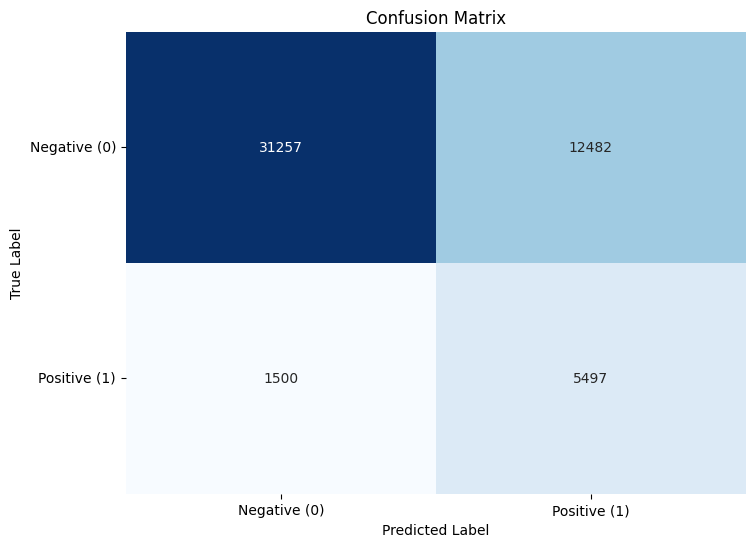

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred_subset)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Negative (0)', 'Positive (1)'], rotation=0)
plt.show()

## Model 4: LightGBM
### a. Model

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, f1_score, ConfusionMatrixDisplay

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
feature_data = cdc_diabetes_health_indicators.data.features
target_data = cdc_diabetes_health_indicators.data.targets

In [3]:
X = feature_data
y = target_data.Diabetes_binary

In [4]:
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25)

In [5]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [6]:
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train, free_raw_data=False)

In [7]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',

    'learning_rate': 0.0001,
    'num_leaves': 15, # more leaves increases accuracy, but may lead to overfitting.

    'max_depth': 4, # the maximum tree depth. Shallower trees reduce overfitting.
    'min_split_gain': 0., # minimal loss gain to perform a split
    'min_child_samples': 20, # or min_data_in_leaf: specifies the minimum samples per leaf node.
    # 'min_child_weight': 5, # minimal sum hessian in one leaf. Controls overfitting.

    # 'lambda_l1': 0.1, # L1 regularization
    'lambda_l2': 0.9, # L2 regularization

    'feature_fraction': 0.7, # randomly select a fraction of the features before building each tree.
    # Speeds up training and controls overfitting.
    # 'bagging_fraction': 0.5, # allows for bagging or subsampling of data to speed up training.
    # 'bagging_freq': 0, # perform bagging on every Kth iteration, disabled if 0.

    'scale_pos_weight': 6, # add a weight to the positive class examples (compensates for imbalance).

    # 'subsample_for_bin': 2000, # amount of data to sample to determine histogram bins
    # 'max_bin': 10, # the maximum number of bins to bucket feature values in.
    # LightGBM autocompresses memory based on this value. Larger bins improves accuracy.
    # 'nthread': 4, # number of threads to use for LightGBM, best set to number of actual cores.
}

In [8]:
evals_result = {}
gbm = lgb.train(params, # parameter dict to use
                lgb_train,
                num_boost_round=10000, # the boosting rounds or number of iterations.
                early_stopping_rounds=50, # early stopping iterations.
                # stop training if *no* metric improves on *any* validation data.
                valid_sets=[lgb_train, lgb_val],
                evals_result=evals_result, # dict to store evaluation results in.
                verbose_eval=100) # print evaluations during training.

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass '

[LightGBM] [Info] Number of positive: 21133, number of negative: 131075
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 152208, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.138843 -> initscore=-1.824934
[LightGBM] [Info] Start training from score -1.824934
Training until validation scores don't improve for 50 rounds
[100]	training's binary_logloss: 0.400504	valid_1's binary_logloss: 0.402729
[200]	training's binary_logloss: 0.398321	valid_1's binary_logloss: 0.400519
[300]	training's binary_logloss: 0.396297	valid_1's binary_logloss: 0.398467
[400]	training's binary_logloss: 0.394461	valid_1's binary_logloss: 0.396606
[500]	training's binary_logloss: 0.392781	valid_1's binary_logloss: 0

### b. Evaluation Metrics

In [9]:
y_val_pred = gbm.predict(X_val, num_iteration=gbm.best_iteration)
threshold = sorted(y_val_pred)[43625] # Determine the threshold based on positive/negative ratio
y_val_pred = np.where(y_val_pred > threshold, 1, 0)
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1-Score on Validation Set: {f1}")

F1-Score on Validation Set: 0.8385462465990434


In [10]:
# Predict on the test set
y_test_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_test_pred = np.where(y_test_pred > threshold, 1, 0)
# Evaluate the model
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1-Score on Test Set: {f1}")

F1-Score on Test Set: 0.8428663430584075


In [11]:
print(metrics.classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     43630
           1       0.44      0.44      0.44      7106

    accuracy                           0.84     50736
   macro avg       0.67      0.68      0.67     50736
weighted avg       0.84      0.84      0.84     50736

Confusion Matrix:
 [[39576  4054]
 [ 3944  3162]]


In [12]:
female_idx = X_test['Sex']==0
male_idx = X_test['Sex']==1

female_test = y_test.loc[female_idx]
male_test = y_test.loc[male_idx]

female_pred  = y_test_pred[female_idx]
male_pred = y_test_pred[male_idx]

y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)
female_score = y_pred_prob[female_idx]
male_score = y_pred_prob[male_idx]

true_y = {'all': y_test, 'female':female_test, 'male':male_test}
pred_y = {'female':female_pred, 'male':male_pred}
prob_y = {'all':y_pred_prob, 'female':female_score, 'male':male_score}

for group in ['all', 'female', 'male']:
    AUC = metrics.roc_auc_score(true_y[group], prob_y[group])
    print(f'AUC ({group} participants): {AUC:.4f}')


tn, fp, fn, tp = {}, {}, {}, {}
for group in ['female', 'male']:
    tn[group], fp[group], fn[group], tp[group] = metrics.confusion_matrix(true_y[group], pred_y[group]).ravel()

AUC (all participants): 0.8208
AUC (female participants): 0.8356
AUC (male participants): 0.8031


In [13]:
for group in ['female', 'male']:
    FNR = fn[group]/(tp[group]+fn[group])
    print(f'FNR ({group} participants): {FNR:.4f}')

FNR (female participants): 0.5209
FNR (male participants): 0.5911


In [14]:
for group in ['female', 'male']:
    FPR = fp[group]/(tn[group]+fp[group])
    print(f'FPR ({group} participants): {FPR:.4f}')

FPR (female participants): 0.0935
FPR (male participants): 0.0921


In [15]:
for group in ['female', 'male']:
    PR = pred_y[group].mean()
    print(f'Fraction positive ({group} participants): {PR:.4f}')

Fraction positive (female participants): 0.1430
Fraction positive (male participants): 0.1413


In [16]:
one_idx = X_test['Income']==1
two_idx = X_test['Income']==2
three_idx = X_test['Income']==3
four_idx = X_test['Income']==4
five_idx = X_test['Income']==5
six_idx = X_test['Income']==6
seven_idx = X_test['Income']==7
eight_idx = X_test['Income']==8

one_test = y_test.loc[one_idx]
two_test = y_test.loc[two_idx]
three_test = y_test.loc[three_idx]
four_test = y_test.loc[four_idx]
five_test = y_test.loc[five_idx]
six_test = y_test.loc[six_idx]
seven_test = y_test.loc[seven_idx]
eight_test = y_test.loc[eight_idx]

one_pred  = y_test_pred[one_idx]
two_pred = y_test_pred[two_idx]
three_pred = y_test_pred[three_idx]
four_pred = y_test_pred[four_idx]
five_pred = y_test_pred[five_idx]
six_pred = y_test_pred[six_idx]
seven_pred = y_test_pred[seven_idx]
eight_pred = y_test_pred[eight_idx]

y_pred_prob = gbm.predict(X_test, num_iteration=gbm.best_iteration)
one_score = y_pred_prob[one_idx]
two_score = y_pred_prob[two_idx]
three_score = y_pred_prob[three_idx]
four_score = y_pred_prob[four_idx]
five_score = y_pred_prob[five_idx]
six_score = y_pred_prob[six_idx]
seven_score = y_pred_prob[seven_idx]
eight_score = y_pred_prob[eight_idx]


true_y = {'all': y_test, 'Income 1':one_test, 'Income 2':two_test, 'Income 3':three_test,
          'Income 4':four_test,'Income 5':five_test,'Income 6':six_test,'Income 7':seven_test,'Income 8':eight_test}
pred_y = {'Income 1':one_pred, 'Income 2':two_pred, 'Income 3':three_pred,
          'Income 4':four_pred,'Income 5':five_pred,'Income 6':six_pred,'Income 7':seven_pred,'Income 8':eight_pred}
prob_y = {'all': y_pred_prob, 'Income 1':one_score, 'Income 2':two_score, 'Income 3':three_score,
          'Income 4':four_score,'Income 5':five_score,'Income 6':six_score,'Income 7':seven_score,'Income 8':eight_score}


for group in ['all', 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    AUC = metrics.roc_auc_score(true_y[group], prob_y[group])
    print(f'AUC ({group} participants): {AUC:.4f}')


tn, fp, fn, tp = {}, {}, {}, {}
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    tn[group], fp[group], fn[group], tp[group] = metrics.confusion_matrix(true_y[group], pred_y[group]).ravel()

AUC (all participants): 0.8208
AUC (Income 1 participants): 0.7860
AUC (Income 2 participants): 0.7560
AUC (Income 3 participants): 0.7740
AUC (Income 4 participants): 0.7822
AUC (Income 5 participants): 0.7831
AUC (Income 6 participants): 0.8098
AUC (Income 7 participants): 0.8148
AUC (Income 8 participants): 0.8257


In [17]:
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    FNR = fn[group]/(tp[group]+fn[group])
    print(f'FNR ({group} participants): {FNR:.4f}')

FNR (Income 1 participants): 0.3596
FNR (Income 2 participants): 0.3862
FNR (Income 3 participants): 0.4443
FNR (Income 4 participants): 0.4813
FNR (Income 5 participants): 0.5272
FNR (Income 6 participants): 0.5590
FNR (Income 7 participants): 0.6533
FNR (Income 8 participants): 0.7343


In [18]:
for group in ['Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8']:
    FPR = fp[group]/(tn[group]+fp[group])
    print(f'FPR ({group} participants): {FPR:.4f}')

FPR (Income 1 participants): 0.2342
FPR (Income 2 participants): 0.2488
FPR (Income 3 participants): 0.2007
FPR (Income 4 participants): 0.1661
FPR (Income 5 participants): 0.1397
FPR (Income 6 participants): 0.0995
FPR (Income 7 participants): 0.0655
FPR (Income 8 participants): 0.0328


In [19]:
for group in 'Income 1', 'Income 2', 'Income 3', 'Income 4', 'Income 5', 'Income 6', 'Income 7', 'Income 8':
    PR = pred_y[group].mean()
    print(f'Fraction positive ({group} participants): {PR:.4f}')

Fraction positive (Income 1 participants): 0.3262
Fraction positive (Income 2 participants): 0.3517
Fraction positive (Income 3 participants): 0.2821
Fraction positive (Income 4 participants): 0.2375
Fraction positive (Income 5 participants): 0.1995
Fraction positive (Income 6 participants): 0.1497
Fraction positive (Income 7 participants): 0.0984
Fraction positive (Income 8 participants): 0.0514


### c. Informative Plots

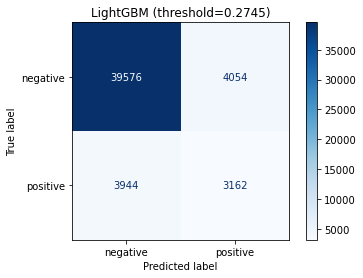

F1 Score: 0.842


In [31]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
# disp.plot()
plt.title(f'LightGBM (threshold={round(threshold, 4)})')
plt.show()
# calculate score
score = f1_score(y_test, y_test_pred, average='micro')
print('F1 Score: %.3f' % score)

# 5. Results

### a. Interpret the results of each model

In Model 1, the f1-score was 0.795, with an overall AUC of 0.7828, and FNR of 0.432. For most participants, the model predicted their diabetes outcome correctly. When we looked at these metrics for the different subgroups within sex and income, we saw that overall the metrics did not change for each subgroup. Looking at the sex subgroup, female particpants had a FNR of 0.3943 while male participants had a FNR of 0.4735. The slightly higher FNR for male participants could be attributed to the higher number of female participants and thus more data for this subgroup as we highlighted in the summary statistics above. As for different income groups, the AUC score and FNR had a positive relationship with the income group, with lower income groups having a lower AUC and FNR score while higher income groups having higher AUC and FNR scores. The highest FNR recorded was for Income group 8, which are participants who recorded having an income of \$ 75,000 or more. This result does not follow our initial hypothesis for lower income groups potentially having more unfair results from the model, as the higher income groups having higher FNR and FPR. However, this could also be attributed to a higher representation of high income groups in the dataset. Additionally, the fraction positive proportion had a negative relationship with income subgroups, with lower subgroups having the highest fraction positive such as 0.6299 and 0.6330 for Income 1 and Income 2 participants who have an income level around or less than 10,000. We can hypothesize that lower income groups may be less represented in the dataset, but the ones that did participate in the survey have had history of health issues related to diabetes or high cholestrol.

### b. Compare the performance of your models from part 4 on the evaluation metrics you noted in section 3a

# 6. Contribution Notes


[ here ]

# 7. Sources Cited

* Behavioral Risk Factor Surveillance System (BRFSS) 2015 Codebook Report: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf
* INFO 4390 Assignment 1 (answered)
* [1] UC Irvine Machine Learning Repository. 2023. CDC Diabetes Health Indicators. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators. Accessed February 19th, 2024